<figure>
<center>
<img src="../Imagenes/logo_final.png"  align="left"/> 
</center>   
</figure>

# <span style="color:red"><center>BERT</center></span>

<center>Explorando modelos pre-entrenados</center>

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Diseño gráfico y Marketing digital</span>
 

1. Maria del Pilar Montenegro Reyes, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

## <span style="color:blue">Referencias</span> 

1. [HuggingFace BERT model](https://huggingface.co/transformers/model_doc/bert.html)
1. [Getting Started with Google BERT: Build and train state-of-the-art natural language processing models using BERT](http://library.lol/main/A0CA3A1276D07957FD7B28F843C299BA)
1. [Transformers for Natural Language Processing: Build innovative deep neural network architectures for NLP with Python, PyTorch, TensorFlow, BERT, RoBERTa, and more](http://library.lol/main/A8C97E552646B3F194ECA333221CEE88)
1. [HuggingFace. Transformers ](https://huggingface.co/transformers/)
1. [HuggingFace. Intro pipeline](https://huggingface.co/course/chapter1/3?fw=pt)
1. [Tutorial Transformer de Google](https://www.tensorflow.org/text/tutorials/transformer)
1. [Transformer-chatbot-tutorial-with-tensorflow-2](https://blog.tensorflow.org/2019/05/transformer-chatbot-tutorial-with-tensorflow-2.html) 
1. [Transformer Architecture: The positional encoding](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)
1. [Illustrated Auto-attención](https://towardsdatascience.com/illustrated-self-attention-2d627e33b20a)
1. [Illustrated Attention](https://towardsdatascience.com/attn-illustrated-attention-5ec4ad276ee3#0458)
1. [Neural Machine Translation by Jointly Learning to Align and Translate (Bahdanau et. al, 2015)](https://arxiv.org/pdf/1409.0473.pdf)
1. [Effective Approaches to Attention-based Neural Machine Translation (Luong et. al, 2015)](https://arxiv.org/pdf/1508.04025.pdf)
1. [Attention Is All You Need (Vaswani et. al, 2017)](https://arxiv.org/pdf/1706.03762.pdf)
1. [Self-Attention GAN (Zhang et. al, 2018)](https://arxiv.org/pdf/1805.08318.pdf)
1. [Sequence to Sequence Learning with Neural Networks (Sutskever et. al, 2014)](https://arxiv.org/pdf/1409.3215.pdf)
1. [TensorFlow’s seq2seq Tutorial with Attention (Tutorial on seq2seq+attention)](https://github.com/tensorflow/nmt)
1. [Lilian Weng’s Blog on Attention (Great start to attention)](https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html#a-family-of-attention-mechanisms)
1. [Jay Alammar’s Blog on Seq2Seq with Attention (Great illustrations and worked example on seq2seq+attention)](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/)
1. [Google’s Neural Machine Translation System: Bridging the Gap between Human and Machine Translation (Wu et. al, 2016)](https://arxiv.org/pdf/1609.08144.pdf)
1. [Adam: A method for stochastic optimization](https://arxiv.org/pdf/1412.6980.pdf)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Extracción de incrustamientos de un modelo BERT pre-entrenado](#Extracción-de-incrustamientos-de-un-modelo-BERT-pre-entrenado)

## <span style="color:blue">Introducción</span>

Usaremos la implementación de HuggingFace in en Pytorch. 

+ BERT es un modelo con incrustaciones de posición absoluta, por lo que generalmente se recomienda rellenar (padding) las entradas a la derecha en lugar de a la izquierda.

+ BERT fue entrenado con el modelado de lenguaje enmascarado (MLM) y los objetivos de predicción de la siguiente oración (NSP). Es eficiente para predecir tokens enmascarados y en NLU en general, pero no es óptimo para la generación de texto.

## <span style="color:blue">Extracción de incrustamientos de un modelo BERT pre-entrenado</span>

La tarea de PLN es análisis de sentimiento. El primer experimento lo hacemos en inglés y luego en Español. Para esta tarea esta bién usar el modelo uncase (eliminando mayúsculas). 

In [1]:
from transformers import BertModel, BertTokenizer
import torch


### Cargamos el modelo pre-entrenado 'bert-base-uncase' y su respectivo tokenizador

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')
                                 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

### Preprocesamiento de la entrada

In [4]:
# sentencia
sentence = 'I love París'

# tokenización
tokens = tokenizer.tokenize(sentence)

# print
print(tokens)

['i', 'love', 'paris']


### Agregamos los tokens [CLS] al comienzo y [SEP] al final de la lista de tokens

In [5]:
tokens = ['[CLS]'] + tokens + ['[SEP]']

print(tokens)

['[CLS]', 'i', 'love', 'paris', '[SEP]']


###  Relleno y máscara para la sentencia

El tamaño de la lista de tokens es 5. Supongamos que hemos decidido que el tamaño máximo se las sentencias será 7. BERT está constuido para aceptar sentencias hasta de tamaño 512. Todas las sentencias deben tener el mismo tamaño.

In [6]:
## Relleno
max_sentence_size = 7
pad_size = max_sentence_size - len(tokens)

for i in range(pad_size): 
    tokens = tokens + ['[PAD]'] 

print(tokens)


['[CLS]', 'i', 'love', 'paris', '[SEP]', '[PAD]', '[PAD]']


In [7]:
## máscara de atención
attention_mask = [1 if i!= '[PAD]' else 0 for i in tokens]
print(attention_mask)

[1, 1, 1, 1, 1, 0, 0]


### Convertimos la lista de tokens en la lista de ID de los tokens

In [8]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(token_ids)

[101, 1045, 2293, 3000, 102, 0, 0]


### Convertimos token_ids y attention_mask a tensores

In [9]:
token_ids = torch.tensor(token_ids).unsqueeze(0) # unsuezze es para agregar una dimensión al comienzo (varias sentencias)
attention_mask = torch.tensor(attention_mask).unsqueeze(0)
print(token_ids) # tensor([[ 101, 1045, 2293, 3000,  102,    0,    0]])

tensor([[ 101, 1045, 2293, 3000,  102,    0,    0]])


In [10]:
print(token_ids)
print(attention_mask)

tensor([[ 101, 1045, 2293, 3000,  102,    0,    0]])
tensor([[1, 1, 1, 1, 1, 0, 0]])


### Pregunta

In [ ]:
¿Cómo hace esto con tensorflow?

### Extracción del incrustamiento final

model regresa una lista con dos objetos: 

* El primer valor, *last_hidden_state*, contiene la representación de todos los tokens obtenidos solo de la capa del codificador final (codificador 12).
* A continuación, *pooler_output* indica la representación del token [CLS] de la capa codificadora final, que se procesa posteriormente mediante una capa lineal y una activación *tanh*. La capa lineal es entrenada cuando se entrena el modelo BERT para la tarea NSP (Next sequence prediction).


In [12]:
out = model(token_ids, attention_mask = attention_mask)
last_hidden_state, pooler_output = out.last_hidden_state, out.pooler_output # out[0], out[1]


In [13]:
print(last_hidden_state.shape)

torch.Size([1, 7, 768])


* Tamaño batch = 1
* Tamaño secuencia = 7
* tamaño del emebdding = 768

In [14]:
# out es un diccionario. Podemos obtener las claves  así:
out.keys()

odict_keys(['last_hidden_state', 'pooler_output'])

### Extracción de los incrustamientos de todas las capas codificadoras

En esta sección revisamos como extraer las incrustaciones (embeddings) que salen de cada una de las capas codificadoras (12 por ejemplo en el modelo base). Algunos veces estop se hace para extraer diferentes features de las sentencias. 

Por ejemplo en la tarea NER (name entity recognition) los investigadores han usado las incrustaciones de las diferentes capas, para hacr promedios pesados de algunas de ellas y con esto han podido mejorar la exactitud en la precisión.

Para hacer esto, es necesario instanciar el modelo preentrenado con la opción *output_hidden_states=True*:

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [23]:
out = model(token_ids, attention_mask=attention_mask)

last_hidden_state, pooler_output, hidden_states = \
        out.last_hidden_state, out.pooler_output, out.hidden_states


In [32]:
print(last_hidden_state.shape)
print(pooler_output.shape)
print(len(hidden_states)) # esta es una lista conteniendo las
                          # incrutaciones de todas las capas codificadoras

torch.Size([1, 7, 768])
torch.Size([1, 768])
13


Observe que *hidden_states* tiene 13 elementos. La capa 0 corresponde a la incrustación de la capa de entrada, luego los elementos 1 a 12 corresponden a las incrustaciones de de salida de cada una de las 12 capas codificadoras.


La representación de los token de la última capa oculta (codificadora) pueden ser obtenidos así:

* *last_hidden_state[0][0]*: entrega la representación del prime token, es decir, *[CLS]*.
* *last_hidden_state[0][1]*: entrega la representación del Token *I*.
* *last_hidden_state[0][2]*: entrega la representación del Token *love*. 

Esta es la representación contextual final de los token. 

Las incrustaciones de cada capa *i*, se obtienen mediante *hidden_states[i]:

In [33]:
# Incrutaciones de la capa de entrada
input_embedding = hidden_states[0]
print(input_embedding.shape)

# incrustaciones de la capa codificadora 11
embedding_11 = hidden_states[11]
print(embedding_11.shape)


torch.Size([1, 7, 768])
torch.Size([1, 7, 768])


In [34]:
help(out)

Help on BaseModelOutputWithPoolingAndCrossAttentions in module transformers.modeling_outputs object:

class BaseModelOutputWithPoolingAndCrossAttentions(transformers.file_utils.ModelOutput)
 |  BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state: torch.FloatTensor = None, pooler_output: torch.FloatTensor = None, hidden_states: Union[Tuple[torch.FloatTensor], NoneType] = None, past_key_values: Union[Tuple[Tuple[torch.FloatTensor]], NoneType] = None, attentions: Union[Tuple[torch.FloatTensor], NoneType] = None, cross_attentions: Union[Tuple[torch.FloatTensor], NoneType] = None) -> None
 |  
 |  Base class for model's outputs that also contains a pooling of the last hidden states.
 |  
 |  Args:
 |      last_hidden_state (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, sequence_length, hidden_size)`):
 |          Sequence of hidden-states at the output of the last layer of the model.
 |      pooler_output (:obj:`torch.FloatTensor` of shape :obj:`(batch_size, hidden_size)`)

### Recuperando los pesos de atención

Los pesos de  atención después de la atención softmax, se utilizan para calcular el promedio ponderado en las cabezas de  autoatención. 
Son obtenidos pasando al modelo *output_attentions=True*

+ *output attention* es una tupla. Cada elemento coresponde a los pesos de atención de cada capa codificadora.

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [12]:
out = model(token_ids, attention_mask=attention_mask)

last_hidden_state, pooler_output, hidden_states, attentions = \
        out.last_hidden_state, out.pooler_output, out.hidden_states, \
        out.attentions
print(len(attentions))

12


In [13]:
print(attentions[11].shape)

torch.Size([1, 12, 7, 7])


La salida se explica así:

- El tamaño del batch es 1. Una sentencia.
- Son 12 cabezas de atención.
- La sentencia viene de tamaño 7.

Por lo tanto tenemos la salida de las 12 cabezas de atención para la sentencia.

Vamos a darle una mirada a los pesos de atención de la última capa codificadora



In [14]:
attention11 = attentions[11].squeeze()#elimina la dimensión de batch.

In [15]:
attention11.shape

torch.Size([12, 7, 7])

### Función para graficar pesos de atención de una cabeza

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# versión con decode utf-8
def plot_attention_head_cp(in_tokens, translated_tokens, attention):
  # The plot is of the attention when a token was generated.
  # The model didn't generate `<START>` in the output. Skip it.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)



def plot_attention_head(in_tokens, translated_tokens, attention):
  # The plot is of the attention when a token was generated.
  # The model didn't generate `<START>` in the output. Skip it.
  #translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  pcm = ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label for label in in_tokens]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label for label in translated_tokens]
  ax.set_yticklabels(labels)
  
 

In [17]:
head = attention11[0]
head.shape

torch.Size([7, 7])

In [ ]:
head = head.detach().numpy()

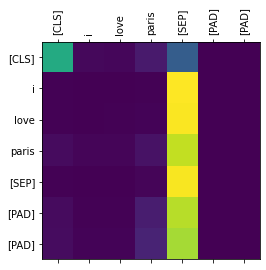

In [64]:
plot_attention_head(in_tokens=tokens, translated_tokens=tokens, attention=head)

### Visualizando los pesos de todas las cabezas de atención

In [65]:
def plot_attention_weights(sentence, translated_tokens, attention_heads):
  in_tokens = sentence
  #in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
  #in_tokens = tokenizers.pt.lookup(in_tokens)[0]
  #in_tokens

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(3, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()

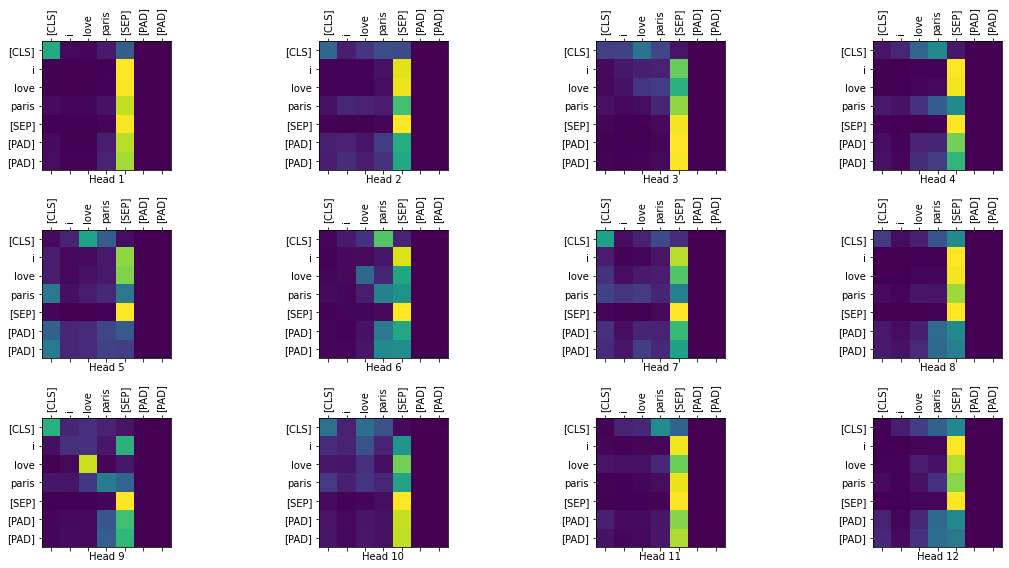

In [66]:
heads = attention11.detach().numpy()

plot_attention_weights(sentence=tokens, translated_tokens=tokens, 
                      attention_heads=heads)